In [213]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(2,8)

# Read data in

df = pd.read_csv("Movies.csv",header=0)

In [214]:
#looking at top 5 rows of dataframe
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [215]:
#Analyzing missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col,pct_missing))


name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [216]:
#Impute Budget & Gross Missing Values with Median

df[['budget', 'gross']] = df[['budget', 'gross']].fillna(df[['budget', 'gross']].median())

In [217]:
#Data types of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [218]:
# Changing date types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [219]:
#rows X Columns
df.shape

(7668, 15)

In [220]:
# count of missing in column rating
df['released'].isnull().sum()
# remove 2 rows that are missing released date
df.dropna(subset=['released'],inplace=True)

In [222]:
# Separating date_release form country

df[['date_release','country']] = df['released'].astype(str).str.split("(", expand=True)
df['date_release'] = df['date_release'].str[:-1]
df['country'] = df['country'].str[:-1]


In [223]:
#separate date and year

df[['date_release', 'year_release']] = df['date_release'].astype(str).str.split(", ", expand = True)

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star        country    budget  \
0             Stephen King  Jack Nicholson  United States  19000000   
1  Henry De Vere Stacpoole  Brooke Shields  United States   4500000   
2           Leigh Brackett     Mark Hamill  United States  18000000   
3             Jim Abrahams     Robert Hays  United States   3500000   
4       Brian Doyle-Murray     Chevy Chase  United States   6000000   

       gross             company  runtime date_release year_release  
0   46998772        Warner Bros.    146.0      June 13         1980  
1   58853106   Columbia Pictures    104.0       July 2         1980  
2  538375067           Lucasfilm    124.0      June 20         1980  
3   83453539  Paramount Pictures     88.0       July 2         1980  
4   39846344      Orion Pictures     98.0      July 25         1980

In [224]:
#looking at sorting values by Gross
df.sort_values(by=['gross'],inplace=False,ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [225]:
#option that allows to show all rows
pd.set_option('display.max_rows',None)

In [226]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [227]:
df.drop_duplicates().head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star        country    budget  \
0             Stephen King  Jack Nicholson  United States  19000000   
1  Henry De Vere Stacpoole  Brooke Shields  United States   4500000   
2           Leigh Brackett     Mark Hamill  United States  18000000   
3             Jim Abrahams     Robert Hays  United States   3500000   
4       Brian Doyle-Murray     Chevy Chase  United States   6000000   

       gross             company  runtime date_release year_release  
0   46998772        Warner Bros.    146.0      June 13         1980  
1   58853106   Columbia Pictures    104.0       July 2         1980  
2  538375067           Lucasfilm    124.0      June 20         1980  
3   83453539  Paramount Pictures     88.0       July 2         1980  
4   39846344      Orion Pictures     98.0      July 25         1980

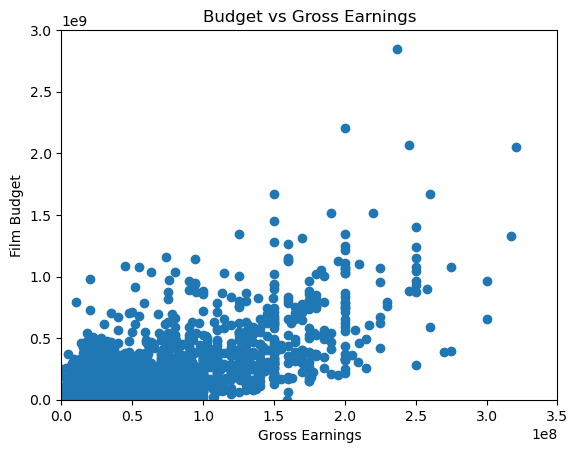

In [233]:
# Scatter Plot of Budget vs Gross
matplotlib.rc_file_defaults()
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.xlim(0,350000000)
plt.ylim(0,3000000000)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

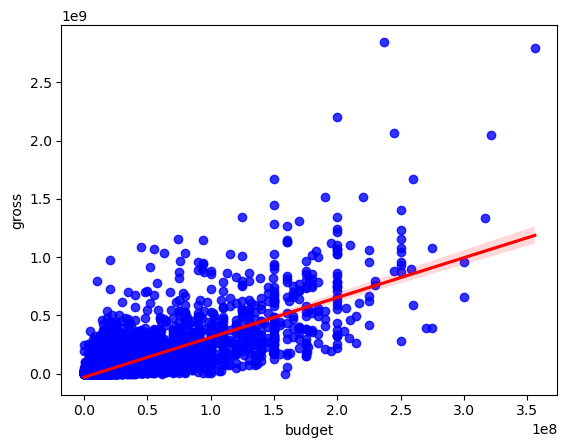

In [234]:
#fit a linear regression line

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})

In [235]:
#shows cross correlations
#high correlation between gross and budget
#high correlation between votes and budget

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.098171  0.222952  0.291789  0.259611  0.120811
score    0.098171  1.000000  0.409221  0.061928  0.185534  0.399451
votes    0.222952  0.409221  1.000000  0.460943  0.632119  0.309212
budget   0.291789  0.061928  0.460943  1.000000  0.745875  0.273363
gross    0.259611  0.185534  0.632119  0.745875  1.000000  0.244360
runtime  0.120811  0.399451  0.309212  0.273363  0.244360  1.000000

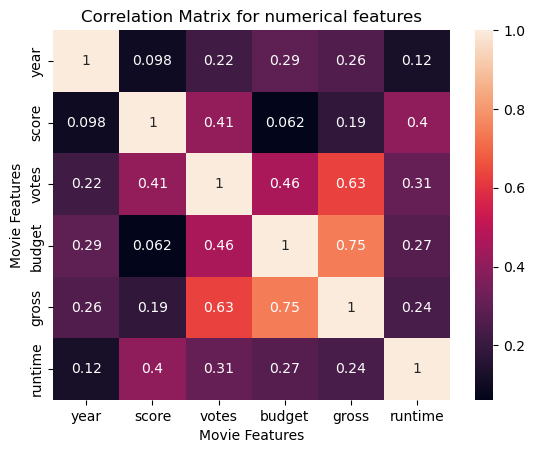

In [236]:
#heatmap correlation matrix
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [237]:
#Change objects to numerical values
df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype=='object'):
        df_num[col_name]=df_num[col_name].astype('category')
        df_num[col_name]=df_num[col_name].cat.codes
        


In [238]:
df_num.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6586       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5572       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5141       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  date_release  \
0  1047       56  19000000   46998772     2319    146.0           210   
1   327       56   4500000   58853106      731    104.0           186   
2  1745       56  18000000  538375067     1540    124.0           221   
3  2246       56   3500000   83453539     1812     88.0           186   
4   410       56   6000000   39846344     1777     98.0           192   

   year_release  
0             0  
1             0  
2             0  
3             0  
4             0

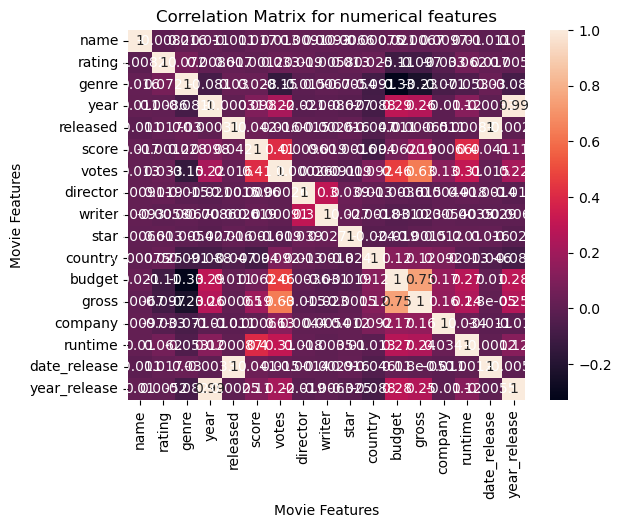

In [239]:
#heatmap correlation matrix
correlation_matrix = df_num.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [240]:
#correlation matrix
correlation_mat = df_num.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()
# looking at correlations above .5
sorted_pairs[(sorted_pairs)>.5]

gross         votes           0.632119
votes         gross           0.632119
gross         budget          0.745875
budget        gross           0.745875
year_release  year            0.993134
year          year_release    0.993134
released      date_release    0.999767
date_release  released        0.999767
name          name            1.000000
writer        writer          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
date_release  date_release    1.000000
year_release  year_release    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings